In [1]:
#import requests
#import bs4
#from bs4 import BeautifulSoup
from tqdm import tqdm

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor  

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))

import warnings
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

from ipywidgets import *
from IPython.display import display
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(9, 7))
sns.set(font_scale=1.5)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

warnings.simplefilter('ignore')

from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor

pd.set_option('display.max_columns', 500)   # to display 500 columns
pd.set_option('display.max_rows', 500) # to display 500 rows

import time
from datetime import datetime

In [2]:
import psycopg2

# DSN (data source name) format for database connections:  
# [protocol / database  name]://[username]:[password]@[hostname / ip]:[port]/[database name here]


# on your computer you are the user postgres (full administrative access)
db_user = 'postgres'
# if you need a password to access a database, put it here
db_password = ''
# on your computer, use localhost
db_host = 'localhost'
# the default port for postgres is 5432
db_port = 5432
# we want to connect to the northwind database
database =   'cms_claims' # 'cms_medicare_claims'  #

conn_str = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{database}'
conn = psycopg2.connect(conn_str)

In [3]:
# Check Tables in the Database
query = """
SELECT tablename 
FROM pg_catalog.pg_tables 
WHERE schemaname='public'
"""

pd.read_sql(query, con=conn)

,tablename
0,icd9_diagonsis
1,icd9_procedures
2,hcpcs
3,beneficiary2008
4,beneficiary2009
5,beneficiary2010
6,inpatient_claims
7,outpatient_claims
8,prescription_drug_events
9,final2008_2009


In [4]:
# Replacing  Nulls with 0

query = """

SELECT 

     "DESYNPUF_ID"
    , "BENE_BIRTH_DT"
    , COALESCE("BENE_DEATH_DT", '2100-01-01') as "BENE_DEATH_DT"
    , COALESCE("BENE_SEX_IDENT_CD", 0) as "BENE_SEX_IDENT_CD"
    , COALESCE("BENE_RACE_CD", 0) as "BENE_RACE_CD"
    , cast((CASE when "END_STAGE_RENAL2008" like 'Y' then '1' else '0' END) as int) as "END_STAGE_RENAL2008"
    , cast((CASE when "END_STAGE_RENAL2009" like 'Y' then '1' else '0' END) as int) as "END_STAGE_RENAL2009"
    , COALESCE("SP_ALZHDMTA2008", 0) as "SP_ALZHDMTA2008"
    , COALESCE("SP_ALZHDMTA2009", 0) as "SP_ALZHDMTA2009"
    , COALESCE("SP_CHF2008", 0) as "SP_CHF2008"
    , COALESCE("SP_CHF2009", 0) as "SP_CHF2009"
    , COALESCE("SP_CHRNKIDN2008", 0) as "SP_CHRNKIDN2008"
    , COALESCE("SP_CHRNKIDN2009", 0) as "SP_CHRNKIDN2009"
    , COALESCE("SP_CNCR2008", 0) as "SP_CNCR2008"
    , COALESCE("SP_CNCR2009", 0) as "SP_CNCR2009"
    , COALESCE("SP_COPD2008", 0) as "SP_COPD2008"
    , COALESCE("SP_COPD2009", 0) as "SP_COPD2009"
    , COALESCE("SP_DEPRESSN2008", 0) as "SP_DEPRESSN2008"
    , COALESCE("SP_DEPRESSN2009", 0) as "SP_DEPRESSN2009"
    , COALESCE("SP_DIABETES2008", 0) as "SP_DIABETES2008"
    , COALESCE("SP_DIABETES2009", 0) as "SP_DIABETES2009"
    , COALESCE("SP_ISCHMCHT2008", 0) as "SP_ISCHMCHT2008"
    , COALESCE("SP_ISCHMCHT2009", 0) as "SP_ISCHMCHT2009"
    , COALESCE("SP_OSTEOPRS2008", 0) as "SP_OSTEOPRS2008"
    , COALESCE("SP_OSTEOPRS2009", 0) as "SP_OSTEOPRS2009"
    , COALESCE("SP_RA_OA2008", 0) as "SP_RA_OA2008"
    , COALESCE("SP_RA_OA2009", 0) as "SP_RA_OA2009"
    , COALESCE("SP_STRKETIA2008", 0) as "SP_STRKETIA2008"
    , COALESCE("TOTAL_DIAGNOSIS2008", 0) as "TOTAL_DIAGNOSIS2008"
    , COALESCE("TOTAL_DIAGNOSIS2009", 0) as "TOTAL_DIAGNOSIS2009"
    , COALESCE("TOTAL_PAYMENT2008", 0) as "TOTAL_PAYMENT2008"
    , COALESCE("TOTAL_PAYMENT2009", 0) as "TOTAL_PAYMENT2009"
    , COALESCE("CHANGE_IN_PAYMEMT", 0) as "CHANGE_IN_PAYMEMT"
    , COALESCE("CHANGE_IN_DIANOSIS", 0) as "CHANGE_IN_DIAGNOSIS"
    , COALESCE("DEAD", 0) as "DEAD"
    , COALESCE("AGE", 0) as "AGE"
    , COALESCE("LOS", 0) as "LOS"
    , COALESCE("NUM_INPT_ADM", 0) as "NUM_INPT_ADM"
    , COALESCE("TOTAL_INPT_COST", 0) as "TOTAL_INPT_COST"
    , COALESCE("TOTAL_INPT_DIAGNOSIS", 0) as "TOTAL_INPT_DIAGNOSIS"
    , COALESCE("TOTAL_INPT_PROCS", 0) as "TOTAL_INPT_PROCS"
    , COALESCE("READMIT7", 0) as "READMIT7" 
    , COALESCE("READMIT30", 0) as "READMIT30"
    , COALESCE("READMIT60", 0) as "READMIT60"
    , COALESCE("READMIT90", 0) as "READMIT90"
    , COALESCE("NUM_OPD_VISIT", 0) as "NUM_OPD_VISIT"
    , COALESCE("TOTAL_OPD_COST", 0) as "TOTAL_OPD_COST"
    , COALESCE("TOTAL_OPD_DIAGNOSIS", 0) as "TOTAL_OPD_DIAGNOSIS"
    , COALESCE("TOTAL_OPD_PROCS", 0) as "TOTAL_OPD_PROCS"
    , COALESCE("TOTAL_OPD_HCPCS", 0) as "TOTAL_OPD_HCPCS"
    , COALESCE("TOTAL_QTY_DSPNSD_NUM", 0) as "TOTAL_QTY_DSPNSD_NUM"
    , COALESCE("PTNT_PAY_RX_AMT", 0) as "PTNT_PAY_RX_AMT"
    , COALESCE("TOT_RX_CST_AMT", 0) as "TOT_RX_CST_AMT"
    , COALESCE("INPT_DIAGS", '') as "INPT_DIAGS"
    , COALESCE("INPT_PROCS", '') as "INPT_PROCS"
    , COALESCE("OPD_DIAGS", '') as "OPD_DIAGS"
    , COALESCE("OPD_PROCS", '') as "OPD_PROCS"
    , COALESCE("OPD_HCPCS", '') as "OPD_HCPCS"
    , CASE when "READMIT7" = 0.0 then 0 else 1 END as "READMIT7_FLAG"  
    , CASE when "READMIT30" = 0.0 then 0 else 1 END as "READMIT30_FLAG" 
    , CASE when "READMIT60" = 0.0 then 0 else 1 END as "READMIT60_FLAG" 
    , CASE when "READMIT90" = 0.0 then 0 else 1 END as "READMIT90_FLAG" 

FROM final2008_2009  
"""

df = pd.read_sql(query, conn) 
# df is patients who are in 2008 and 2009 benefciiary, unfortunately 2010 doesnt have common benefciary patients

print(df.shape)
df.head(2)

(458328, 62)


,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,END_STAGE_RENAL2008,END_STAGE_RENAL2009,SP_ALZHDMTA2008,SP_ALZHDMTA2009,SP_CHF2008,SP_CHF2009,SP_CHRNKIDN2008,SP_CHRNKIDN2009,SP_CNCR2008,SP_CNCR2009,SP_COPD2008,SP_COPD2009,SP_DEPRESSN2008,SP_DEPRESSN2009,SP_DIABETES2008,SP_DIABETES2009,SP_ISCHMCHT2008,SP_ISCHMCHT2009,SP_OSTEOPRS2008,SP_OSTEOPRS2009,SP_RA_OA2008,SP_RA_OA2009,SP_STRKETIA2008,TOTAL_DIAGNOSIS2008,TOTAL_DIAGNOSIS2009,TOTAL_PAYMENT2008,TOTAL_PAYMENT2009,CHANGE_IN_PAYMEMT,CHANGE_IN_DIAGNOSIS,DEAD,AGE,LOS,NUM_INPT_ADM,TOTAL_INPT_COST,TOTAL_INPT_DIAGNOSIS,TOTAL_INPT_PROCS,READMIT7,READMIT30,READMIT60,READMIT90,NUM_OPD_VISIT,TOTAL_OPD_COST,TOTAL_OPD_DIAGNOSIS,TOTAL_OPD_PROCS,TOTAL_OPD_HCPCS,TOTAL_QTY_DSPNSD_NUM,PTNT_PAY_RX_AMT,TOT_RX_CST_AMT,INPT_DIAGS,INPT_PROCS,OPD_DIAGS,OPD_PROCS,OPD_HCPCS,READMIT7_FLAG,READMIT30_FLAG,READMIT60_FLAG,READMIT90_FLAG
0,00000B48BCF4AD29,1923-09-01,2100-01-01,2,5,0,0,1,1,1,1,1,2,1,2,2,2,1,1,1,1,1,1,1,1,2,2,1,9,6,93452.0,8750.0,-84702.0,-3,0,86.0,2419200000000000,3.0,84072.0,27.0,11.0,1.0,2.0,2.0,2.0,10.0,3210.0,27.0,0.0,47.0,210.0,10.0,200.0,3970 2800 9971 41410 V4581 2875 5121 4242 4273...,3615 53081 42820 78321 78321 27493521 9971 560...,2370 2279 V1005 4019 56210 20280 V4581...,...,81001 J3420 96372 96375 70450 99284 99212 90...,1,1,1,1
1,0000141F2FECE9BC,1974-04-01,2100-01-01,2,1,0,0,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,0,1,0.0,5308.0,5308.0,1,0,35.0,172800000000000,1.0,5108.0,9.0,1.0,0.0,0.0,0.0,0.0,30.0,7870.0,99.0,0.0,67.0,9930.0,1740.0,13490.0,5789 79029 5363 5990 3569 2449 2851 311 2869,4516,70709 4149 25000 70712 70709 70707 V4582 4321 ...,...,99214 85730 84443 84100 87086 87046 84436 850...,0,0,0,0


In [5]:
#df.READMIT90_FLAG.unique()

In [6]:
# Checking for nulls

df.isnull().sum()

DESYNPUF_ID             0
BENE_BIRTH_DT           0
BENE_DEATH_DT           0
BENE_SEX_IDENT_CD       0
BENE_RACE_CD            0
END_STAGE_RENAL2008     0
END_STAGE_RENAL2009     0
SP_ALZHDMTA2008         0
SP_ALZHDMTA2009         0
SP_CHF2008              0
SP_CHF2009              0
SP_CHRNKIDN2008         0
SP_CHRNKIDN2009         0
SP_CNCR2008             0
SP_CNCR2009             0
SP_COPD2008             0
SP_COPD2009             0
SP_DEPRESSN2008         0
SP_DEPRESSN2009         0
SP_DIABETES2008         0
SP_DIABETES2009         0
SP_ISCHMCHT2008         0
SP_ISCHMCHT2009         0
SP_OSTEOPRS2008         0
SP_OSTEOPRS2009         0
SP_RA_OA2008            0
SP_RA_OA2009            0
SP_STRKETIA2008         0
TOTAL_DIAGNOSIS2008     0
TOTAL_DIAGNOSIS2009     0
TOTAL_PAYMENT2008       0
TOTAL_PAYMENT2009       0
CHANGE_IN_PAYMEMT       0
CHANGE_IN_DIAGNOSIS     0
DEAD                    0
AGE                     0
LOS                     0
NUM_INPT_ADM            0
TOTAL_INPT_C

In [7]:
#Checking data types

df.dtypes

DESYNPUF_ID                     object
BENE_BIRTH_DT           datetime64[ns]
BENE_DEATH_DT           datetime64[ns]
BENE_SEX_IDENT_CD                int64
BENE_RACE_CD                     int64
END_STAGE_RENAL2008              int64
END_STAGE_RENAL2009              int64
SP_ALZHDMTA2008                  int64
SP_ALZHDMTA2009                  int64
SP_CHF2008                       int64
SP_CHF2009                       int64
SP_CHRNKIDN2008                  int64
SP_CHRNKIDN2009                  int64
SP_CNCR2008                      int64
SP_CNCR2009                      int64
SP_COPD2008                      int64
SP_COPD2009                      int64
SP_DEPRESSN2008                  int64
SP_DEPRESSN2009                  int64
SP_DIABETES2008                  int64
SP_DIABETES2009                  int64
SP_ISCHMCHT2008                  int64
SP_ISCHMCHT2009                  int64
SP_OSTEOPRS2008                  int64
SP_OSTEOPRS2009                  int64
SP_RA_OA2008             

In [8]:
df.columns

Index(['DESYNPUF_ID', 'BENE_BIRTH_DT', 'BENE_DEATH_DT', 'BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'END_STAGE_RENAL2008', 'END_STAGE_RENAL2009',
       'SP_ALZHDMTA2008', 'SP_ALZHDMTA2009', 'SP_CHF2008', 'SP_CHF2009',
       'SP_CHRNKIDN2008', 'SP_CHRNKIDN2009', 'SP_CNCR2008', 'SP_CNCR2009',
       'SP_COPD2008', 'SP_COPD2009', 'SP_DEPRESSN2008', 'SP_DEPRESSN2009',
       'SP_DIABETES2008', 'SP_DIABETES2009', 'SP_ISCHMCHT2008',
       'SP_ISCHMCHT2009', 'SP_OSTEOPRS2008', 'SP_OSTEOPRS2009', 'SP_RA_OA2008',
       'SP_RA_OA2009', 'SP_STRKETIA2008', 'TOTAL_DIAGNOSIS2008',
       'TOTAL_DIAGNOSIS2009', 'TOTAL_PAYMENT2008', 'TOTAL_PAYMENT2009',
       'CHANGE_IN_PAYMEMT', 'CHANGE_IN_DIAGNOSIS', 'DEAD', 'AGE', 'LOS',
       'NUM_INPT_ADM', 'TOTAL_INPT_COST', 'TOTAL_INPT_DIAGNOSIS',
       'TOTAL_INPT_PROCS', 'READMIT7', 'READMIT30', 'READMIT60', 'READMIT90',
       'NUM_OPD_VISIT', 'TOTAL_OPD_COST', 'TOTAL_OPD_DIAGNOSIS',
       'TOTAL_OPD_PROCS', 'TOTAL_OPD_HCPCS', 'TOTAL_QTY_DSPNSD_NUM',

In [15]:
# To delete

query = '''SELECT "DESYNPUF_ID", "INPT_DIAGS" 

FROM final2008_2009  '''

final2008_2009DF_1 = pd.read_sql(query, conn)

#print(final2008_2009DF.shape)
print(type(final2008_2009DF_1))
final2008_2009DF_1.head(4)

#sum("TOTAL_INPT_DIAGNOSIS"),  sum("TOTAL_INPT_PROCS"), sum("TOTAL_OPD_DIAGNOSIS"), 
#sum("TOTAL_OPD_PROCS"), sum("TOTAL_OPD_HCPCS")
# string_agg

<class 'pandas.core.frame.DataFrame'>


,DESYNPUF_ID,INPT_DIAGS
0,00000B48BCF4AD29,3970 2800 9971 41410 V4581 2875 5121 4242 4273...
1,0000141F2FECE9BC,5789 79029 5363 5990 3569 2449 2851 311 2869
2,0000525AB30E4DEF,5579 V4611 5849 99591 42731 4019 78550 53550 7...
3,00009C897C3D8372,0388 5849 486 34839 70703 2639 42731 34831 253...


In [20]:
final2008_2009DF_1.INPT_DIAGS.fillna('', inplace=True)
final2008_2009DF_1.INPT_DIAGS.values

array(['3970 2800 9971 41410 V4581 2875 5121 4242 42731 4241 2760 7802 2763 42821 2762 41410 3970 5119 42823 2859 5119 56400 4263 V4582 3051 25060 4280 ',
       '5789 79029 5363 5990 3569 2449 2851 311 2869 ',
       '5579 V4611 5849 99591 42731 4019 78550 53550 7837 5609 42732 V4579 V4501 79902 2762 53081 51881 5533 ',
       ..., '', '', ''], dtype=object)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(token_pattern='\w+')

cvec.fit(final2008_2009DF_1.INPT_DIAGS.values)
df_1 = pd.DataFrame(cvec.transform(final2008_2009DF_1.INPT_DIAGS.values).toarray(),columns=cvec.get_feature_names())

In [1]:
df_1
#df.transpose().sort_values(0, ascending=False).transpose()

NameError: name 'df' is not defined

In [9]:
# To delete
final2008_2009DF_1["INPT_DIA_LEN"]= final2008_2009DF_1["INPT_DIA"].str.len() 
final2008_2009DF_1

,INPT_DIA,INPT_DIA_LEN
0,3970 2800 9971 41410 V4581 2875 5121 4242 4273...,12188749


In [10]:
# To delete
final2008_2009DF_1["INPT_DIA_SPLITS"]= final2008_2009DF_1["INPT_DIA"].str.split(' ')
final2008_2009DF_1["INPT_DIA_SPLITS"]= final2008_2009DF_1["INPT_DIA"].str.split(',')
print(final2008_2009DF_1["INPT_DIA_SPLITS"].str.len())
final2008_2009DF_1

0    150481
Name: INPT_DIA_SPLITS, dtype: int64


,INPT_DIA,INPT_DIA_LEN,INPT_DIA_SPLITS
0,3970 2800 9971 41410 V4581 2875 5121 4242 4273...,12188749,[3970 2800 9971 41410 V4581 2875 5121 4242 427...


In [13]:
# To delete
len(set(final2008_2009DF_1["INPT_DIA_SPLITS"][0]))

145844

In [ ]:
# To delete
#final2008_2009DF_1["INPT_DIA_SPLITS"].isin('78820')

#### Visualizing the spread of information 

In [ ]:
# Plot value_counts ??

df.iloc[:,5:24].hist(figsize=(24,16), sharex=True, sharey=True)
plt.show()  # 1 means have diesease, 2 means no disease

In [ ]:
df[['TOTAL_INPT_COST', 'TOTAL_OPD_COST',
                                    'TOTAL_PAYMENT2008',
                                    'TOTAL_PAYMENT2009']].hist(figsize=(12,8), sharex=True, sharey=True)
plt.show()  

In [ ]:
#final2008_2009DF_selectedFeatures.iloc[:,20:29].hist(figsize=(12,20), sharex=True, sharey=True)
#plt.show()

In [ ]:
df[['TOTAL_INPT_DIAGNOSIS','TOTAL_INPT_PROCS', 
                                   'TOTAL_OPD_DIAGNOSIS','TOTAL_OPD_PROCS',
                                   'TOTAL_OPD_HCPCS',]].hist(figsize=(12,20), sharex=True, sharey=True) #bins=10
plt.show()  #  'NUM_OPD_VISIT'

In [ ]:
df[['READMIT7','READMIT30','READMIT60','READMIT90']].hist(figsize=(12,8), sharex=True, sharey=True)
plt.show()

In [ ]:
df[['DEAD']].hist(figsize=(12,8), sharex=True, sharey=True)
plt.show()

### Looking for corelation between the variables

In [10]:
corr = df.corr()
corr

,BENE_SEX_IDENT_CD,BENE_RACE_CD,END_STAGE_RENAL2008,END_STAGE_RENAL2009,SP_ALZHDMTA2008,SP_ALZHDMTA2009,SP_CHF2008,SP_CHF2009,SP_CHRNKIDN2008,SP_CHRNKIDN2009,SP_CNCR2008,SP_CNCR2009,SP_COPD2008,SP_COPD2009,SP_DEPRESSN2008,SP_DEPRESSN2009,SP_DIABETES2008,SP_DIABETES2009,SP_ISCHMCHT2008,SP_ISCHMCHT2009,SP_OSTEOPRS2008,SP_OSTEOPRS2009,SP_RA_OA2008,SP_RA_OA2009,SP_STRKETIA2008,TOTAL_DIAGNOSIS2008,TOTAL_DIAGNOSIS2009,TOTAL_PAYMENT2008,TOTAL_PAYMENT2009,CHANGE_IN_PAYMEMT,CHANGE_IN_DIAGNOSIS,DEAD,AGE,LOS,NUM_INPT_ADM,TOTAL_INPT_COST,TOTAL_INPT_DIAGNOSIS,TOTAL_INPT_PROCS,READMIT7,READMIT30,READMIT60,READMIT90,NUM_OPD_VISIT,TOTAL_OPD_COST,TOTAL_OPD_DIAGNOSIS,TOTAL_OPD_PROCS,TOTAL_OPD_HCPCS,TOTAL_QTY_DSPNSD_NUM,PTNT_PAY_RX_AMT,TOT_RX_CST_AMT,READMIT7_FLAG,READMIT30_FLAG,READMIT60_FLAG,READMIT90_FLAG
BENE_SEX_IDENT_CD,1.000000,-0.002014,0.010620,0.012348,-0.028000,-0.029205,-0.029833,-0.030813,-0.019849,-0.022963,-0.003268,-0.001630,-0.019019,-0.022936,-0.034689,-0.034278,-0.041289,-0.039473,-0.034930,-0.032901,-0.031519,-0.029518,-0.027536,-0.024659,-0.008198,0.046593,0.046907,0.012576,0.019875,0.004363,0.002254,-0.001399,0.108223,-0.001133,0.000725,0.000028,0.000635,0.000725,0.000334,0.000929,0.001020,0.001244,-0.001004,-0.001002,-0.001108,0.001997,-0.000744,-0.001632,-0.001358,-0.002229,0.000830,0.001327,0.001194,0.001184
BENE_RACE_CD,-0.002014,1.000000,-0.010043,-0.012050,0.018841,0.021716,0.028560,0.033484,0.021986,0.020971,0.022071,0.025387,0.017502,0.019224,0.013334,0.018506,0.034334,0.036305,0.043116,0.044464,0.023292,0.026563,0.025768,0.026291,0.009768,-0.042165,-0.047135,-0.022515,-0.023577,0.002065,-0.008939,-0.001170,-0.076374,-0.000440,-0.000242,0.000385,-0.000435,-0.001103,-0.000129,0.000252,-0.000014,-0.000274,-0.001168,0.000448,-0.000716,0.001562,-0.000585,-0.002232,-0.002353,-0.002124,-0.000056,0.000165,0.000171,-0.000167
END_STAGE_RENAL2008,0.010620,-0.010043,1.000000,0.223199,-0.181248,-0.157829,-0.248140,-0.213401,-0.444004,-0.255058,-0.097296,-0.074324,-0.213796,-0.179359,-0.165446,-0.146703,-0.239939,-0.213996,-0.223525,-0.193890,-0.114852,-0.092001,-0.139138,-0.117129,-0.153895,0.352498,0.289345,0.344924,0.259135,-0.115592,-0.079428,0.001674,0.027200,-0.001738,-0.000299,0.001185,-0.000333,0.000067,0.000473,0.000675,0.001184,0.001143,0.000940,0.001515,0.001129,-0.002804,0.000962,-0.000249,-0.000565,-0.000759,0.001900,0.001944,0.002582,0.002684
END_STAGE_RENAL2009,0.012348,-0.012050,0.223199,1.000000,-0.166398,-0.171773,-0.232573,-0.239717,-0.282075,-0.447195,-0.093961,-0.084964,-0.188700,-0.195718,-0.162209,-0.160918,-0.238125,-0.245773,-0.222919,-0.221159,-0.115621,-0.108774,-0.136825,-0.129182,-0.130527,0.315891,0.349983,0.270616,0.303923,-0.007912,0.062347,0.001558,0.027577,-0.001553,-0.000825,0.000112,-0.000736,0.000196,-0.000690,-0.001287,-0.001213,-0.000886,0.000602,0.001287,0.000444,0.000252,0.000752,-0.001817,-0.002500,-0.002067,-0.001270,-0.001765,-0.001249,-0.001241
SP_ALZHDMTA2008,-0.028000,0.018841,-0.181248,-0.166398,1.000000,0.291992,0.333186,0.297132,0.301698,0.266537,0.135519,0.105247,0.284289,0.242952,0.288389,0.245311,0.338735,0.302522,0.328952,0.286026,0.189906,0.158117,0.205380,0.172332,0.220724,-0.580613,-0.417511,-0.319746,-0.235378,0.111138,0.217820,0.001288,-0.045553,0.001353,-0.000679,-0.000523,-0.000607,-0.000273,-0.001114,-0.000341,0.000053,0.000161,-0.002282,-0.002415,-0.002543,0.002795,-0.002841,0.000334,0.000735,0.001320,-0.000255,0.000195,0.000158,-0.000003
SP_ALZHDMTA2009,-0.029205,0.021716,-0.157829,-0.171773,0.291992,1.000000,0.295864,0.310265,0.257342,0.280768,0.122077,0.114428,0.236004,0.252206,0.247161,0.266558,0.311600,0.329365,0.305513,0.310485,0.172058,0.178830,0.189202,0.193047,0.172069,-0.418804,-0.564165,-0.249085,-0.273967,0.012033,-0.230136,-0.000193,-0.043412,0.000184,-0.002242,-0.000756,-0.001601,-0.000638,-0.003550,-0.003216,-0.003123,-0.002682,0.000179,0.000031,-0.000383,-0.002060,-0.000547,0.002311,0.001939,0.002009,-0.001730,-0.001622,-0.001738,-0.001723
SP_CHF2008,

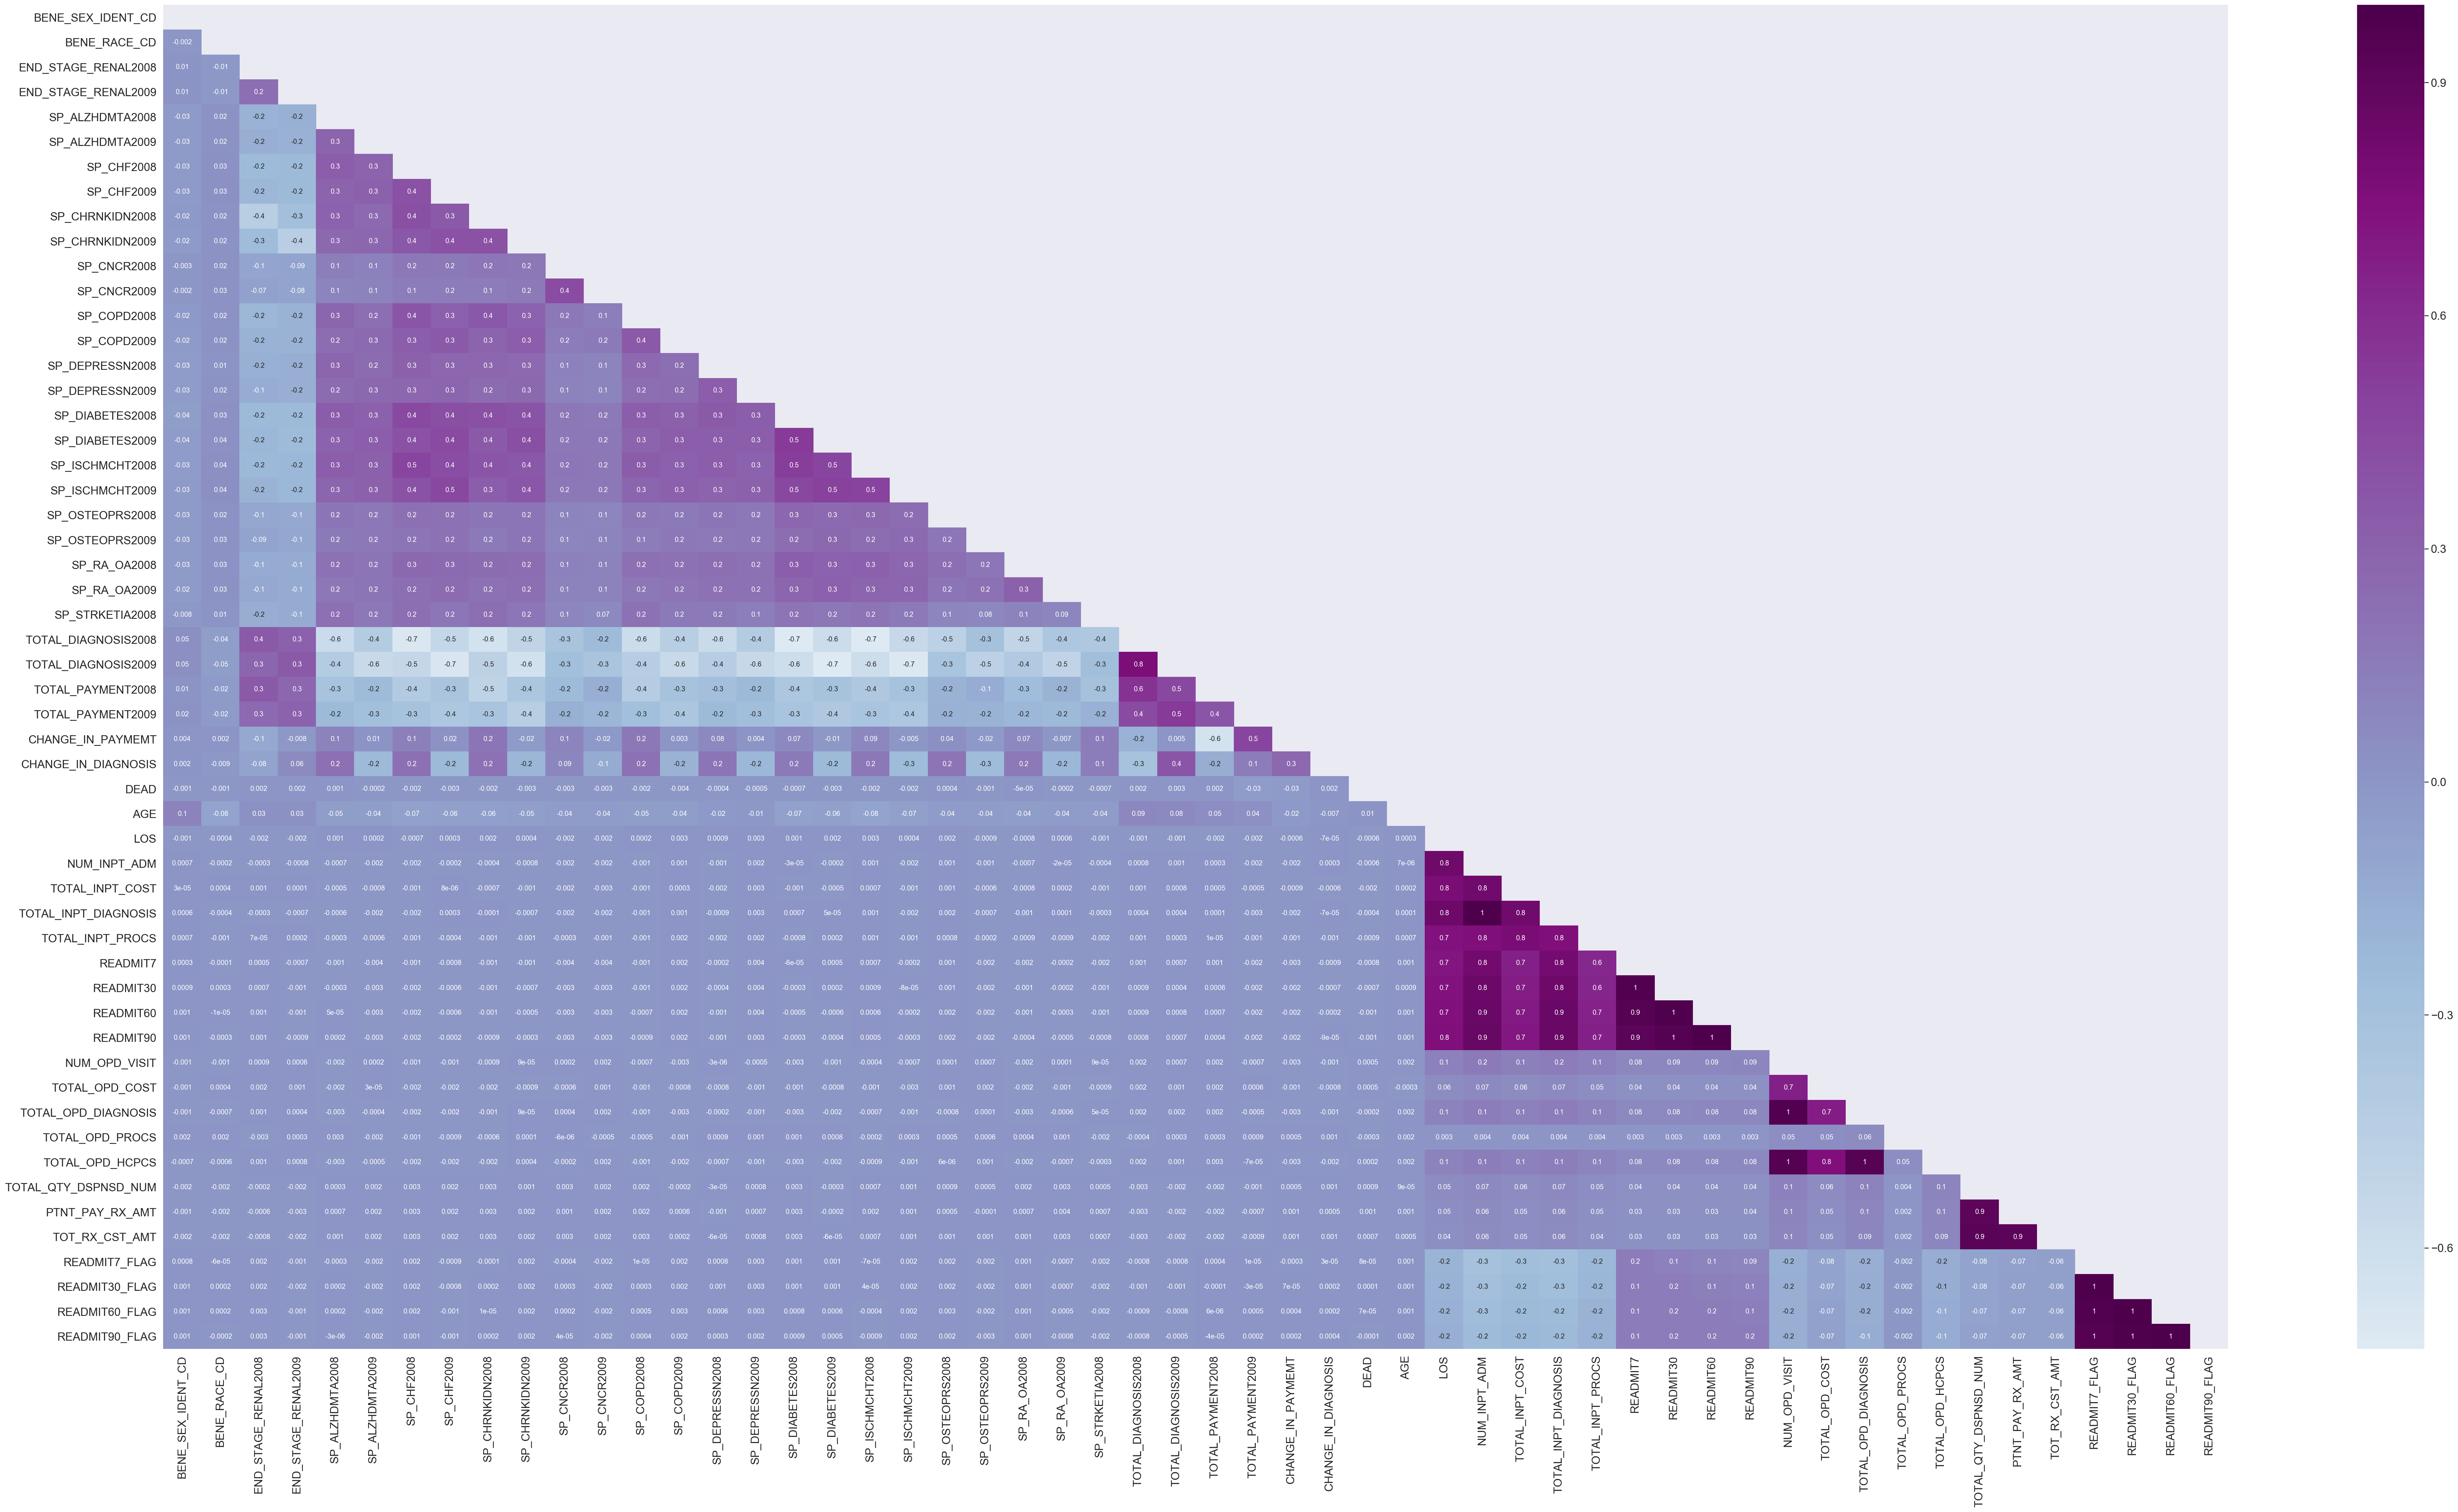

In [11]:
fig, ax = plt.subplots(figsize=(60,36))
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot = True, mask=matrix, center= 0, cmap="BuPu" ,fmt='.1g'); #cmap= 'coolwarm',    

#### Correlation of predcitor variable against the target variables

In [2]:
corr1 = df.corr()[['READMIT30_FLAG']][:] # 'READMIT7', 'READMIT30', 'READMIT60', 'READMIT90'
corr1.sort_values(ascending=False)

NameError: name 'df' is not defined

### Feature selection (excuding string summation of ICDs and features which are showing colinearity etc.)

In [13]:
df_selected = df[['BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'END_STAGE_RENAL2008', 'END_STAGE_RENAL2009',
       'SP_ALZHDMTA2008', 'SP_ALZHDMTA2009', 'SP_CHF2008', 'SP_CHF2009',
       'SP_CHRNKIDN2008', 'SP_CHRNKIDN2009', 'SP_CNCR2008', 'SP_CNCR2009',
       'SP_COPD2008', 'SP_COPD2009', 'SP_DEPRESSN2008', 'SP_DEPRESSN2009',
       'SP_DIABETES2008', 'SP_DIABETES2009', 'SP_ISCHMCHT2008',
       'SP_ISCHMCHT2009', 'SP_OSTEOPRS2008', 'SP_OSTEOPRS2009', 'SP_RA_OA2008',
       'SP_RA_OA2009', 'SP_STRKETIA2008', 'TOTAL_DIAGNOSIS2008',
       'TOTAL_DIAGNOSIS2009', 'TOTAL_PAYMENT2008', 'TOTAL_PAYMENT2009',
       'CHANGE_IN_PAYMEMT', 'CHANGE_IN_DIAGNOSIS', 'AGE', 'LOS',
       'NUM_INPT_ADM', 'TOTAL_INPT_COST', 'TOTAL_INPT_DIAGNOSIS',
       'TOTAL_INPT_PROCS', 
       'NUM_OPD_VISIT', 'TOTAL_OPD_COST', 'TOTAL_OPD_DIAGNOSIS',
       'TOTAL_OPD_PROCS', 'TOTAL_OPD_HCPCS', 'TOTAL_QTY_DSPNSD_NUM',
       'PTNT_PAY_RX_AMT', 'TOT_RX_CST_AMT', 'READMIT30_FLAG']].copy()   # , 'DEAD'
print(df_selected.shape)
df_selected.head(2)  
# 'READMIT7', 'READMIT30', 'READMIT60', 'READMIT90',

(458328, 46)


,BENE_SEX_IDENT_CD,BENE_RACE_CD,END_STAGE_RENAL2008,END_STAGE_RENAL2009,SP_ALZHDMTA2008,SP_ALZHDMTA2009,SP_CHF2008,SP_CHF2009,SP_CHRNKIDN2008,SP_CHRNKIDN2009,SP_CNCR2008,SP_CNCR2009,SP_COPD2008,SP_COPD2009,SP_DEPRESSN2008,SP_DEPRESSN2009,SP_DIABETES2008,SP_DIABETES2009,SP_ISCHMCHT2008,SP_ISCHMCHT2009,SP_OSTEOPRS2008,SP_OSTEOPRS2009,SP_RA_OA2008,SP_RA_OA2009,SP_STRKETIA2008,TOTAL_DIAGNOSIS2008,TOTAL_DIAGNOSIS2009,TOTAL_PAYMENT2008,TOTAL_PAYMENT2009,CHANGE_IN_PAYMEMT,CHANGE_IN_DIAGNOSIS,AGE,LOS,NUM_INPT_ADM,TOTAL_INPT_COST,TOTAL_INPT_DIAGNOSIS,TOTAL_INPT_PROCS,NUM_OPD_VISIT,TOTAL_OPD_COST,TOTAL_OPD_DIAGNOSIS,TOTAL_OPD_PROCS,TOTAL_OPD_HCPCS,TOTAL_QTY_DSPNSD_NUM,PTNT_PAY_RX_AMT,TOT_RX_CST_AMT,READMIT30_FLAG
0,2,5,0,0,1,1,1,1,1,2,1,2,2,2,1,1,1,1,1,1,1,1,2,2,1,9,6,93452.0,8750.0,-84702.0,-3,86.0,2419200000000000,3.0,84072.0,27.0,11.0,10.0,3210.0,27.0,0.0,47.0,210.0,10.0,200.0,1
1,2,1,0,0,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,0,1,0.0,5308.0,5308.0,1,35.0,172800000000000,1.0,5108.0,9.0,1.0,30.0,7870.0,99.0,0.0,67.0,9930.0,1740.0,13490.0,0


In [14]:
df_selected.dtypes

BENE_SEX_IDENT_CD         int64
BENE_RACE_CD              int64
END_STAGE_RENAL2008       int64
END_STAGE_RENAL2009       int64
SP_ALZHDMTA2008           int64
SP_ALZHDMTA2009           int64
SP_CHF2008                int64
SP_CHF2009                int64
SP_CHRNKIDN2008           int64
SP_CHRNKIDN2009           int64
SP_CNCR2008               int64
SP_CNCR2009               int64
SP_COPD2008               int64
SP_COPD2009               int64
SP_DEPRESSN2008           int64
SP_DEPRESSN2009           int64
SP_DIABETES2008           int64
SP_DIABETES2009           int64
SP_ISCHMCHT2008           int64
SP_ISCHMCHT2009           int64
SP_OSTEOPRS2008           int64
SP_OSTEOPRS2009           int64
SP_RA_OA2008              int64
SP_RA_OA2009              int64
SP_STRKETIA2008           int64
TOTAL_DIAGNOSIS2008       int64
TOTAL_DIAGNOSIS2009       int64
TOTAL_PAYMENT2008       float64
TOTAL_PAYMENT2009       float64
CHANGE_IN_PAYMEMT       float64
CHANGE_IN_DIAGNOSIS       int64
AGE     

In [15]:
# Check if and who got readmiited 8 times

### Selecting Predictor and Target Variables

In [16]:
y = df_selected.pop('READMIT30_FLAG')  #df_selected.pop('DEAD') 
X = df_selected  

print(X.shape)
print(y.shape)

(458328, 45)
(458328,)


### Checking for baseline accuracy

In [17]:
y.value_counts(normalize=True)

1    0.773832
0    0.226168
Name: READMIT30_FLAG, dtype: float64

#### Since the dataset doesn't seem to be too imbalance, over or under sampling isn't required

### Train - Test split

In [18]:
# Creating Train, test split with Target variable for fixed features 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True) #, stratify=y ) #, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(366662, 45)
(366662,)
(91666, 45)
(91666,)


#### Standardize the data

In [19]:
# Standardize the data
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### Principal Component Analysis to select important features and remove any colinear features

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=28)

# PCA fit-tranform on train data
X_train_pca = pca.fit_transform(X_train)

# Converting into DataFrame
PCA_col_dict = {'PCA'+str(i+1): pca.components_[i]
            for i in range(len(pca.components_))}
X_train_pca = pd.DataFrame(X_train_pca, columns=PCA_col_dict) 
print(X_train_pca.shape)

# PCA tranform on test data
X_test_pca = pca.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, columns=PCA_col_dict) 

print(X_test_pca.shape)

X_train_pca.head(2)

(366662, 28)
(91666, 28)


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28
0,-0.607523,-1.816129,-1.058568,0.762222,0.047442,-0.617201,-0.323746,-0.106552,0.189942,-0.927369,0.206846,0.732858,0.990056,-1.475294,-0.507522,0.476974,-0.255483,1.063725,-0.344949,0.633395,0.076187,0.076733,-0.091107,-0.330364,1.217801,1.380667,-0.200819,0.339218
1,2.746602,-0.494379,1.135475,-1.522416,-1.391693,-1.178979,-1.015940,-1.184328,0.069296,1.458055,-0.542591,0.993631,-1.112241,-0.913569,-0.182230,-0.314653,-0.812027,-1.340845,1.846141,1.631659,0.471533,0.646941,-1.085154,-0.813183,0.206780,-1.257831,0.072027,-0.262918


In [21]:
explained_variance = pca.explained_variance_ratio_
explained_variance.cumsum()

array([0.20116247, 0.3027466 , 0.37610196, 0.4365047 , 0.49121289,
       0.52200346, 0.55104834, 0.57936434, 0.60429297, 0.62666455,
       0.64878517, 0.67078755, 0.69055568, 0.71000353, 0.72893831,
       0.74752483, 0.76609009, 0.78411101, 0.80126411, 0.81789005,
       0.83297327, 0.84757736, 0.86186867, 0.87548529, 0.88841699,
       0.90132287, 0.91392554, 0.9260965 ])

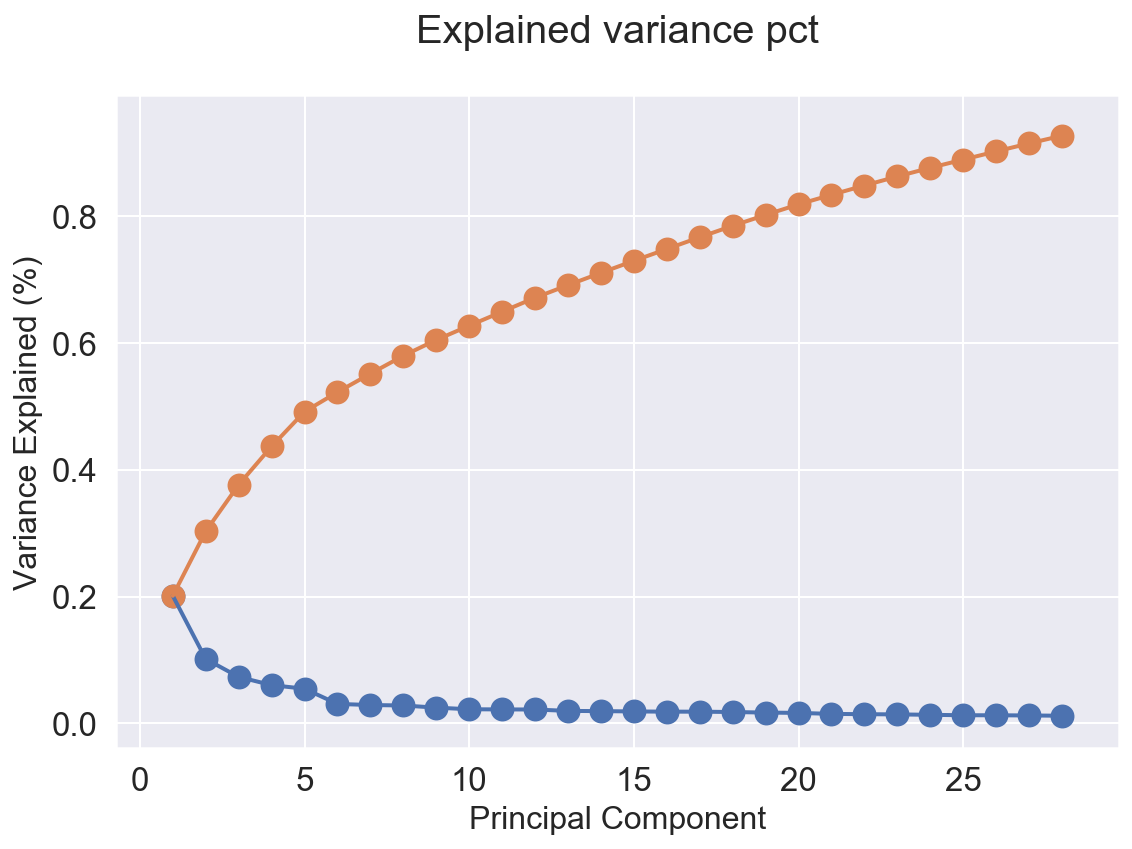

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
x_values = list(range(1, pca.n_components_+1))
ax.plot(x_values, explained_variance, lw=2)
ax.scatter(x_values, explained_variance, s=120)
ax.plot(x_values, np.cumsum(explained_variance), lw=2)
ax.scatter(x_values, np.cumsum(explained_variance), s=120)
#ax.plot(x_values,0.9)
ax.set_title('Explained variance pct\n', fontsize=20)
ax.set_xlabel('Principal Component', fontsize=16)
ax.set_ylabel('Variance Explained (%)', fontsize=16)
plt.show()

#### We select 32 PCA's which return 95% of variance  (28 PCA return 90% variance)

In [ ]:
'''
Xpca_corr = X_pca.corr() #correlations.loc[[col for col in X_combined.columns if 'PCA' in col], disciplines]

fig, ax = plt.subplots(figsize=(60,36))
matrix = np.triu(Xpca_corr)
ax = sns.heatmap(Xpca_corr, annot = True, mask=matrix, center= 0, cmap="BuPu" ,fmt='.1g'); #cmap= 'coolwarm',  
'''

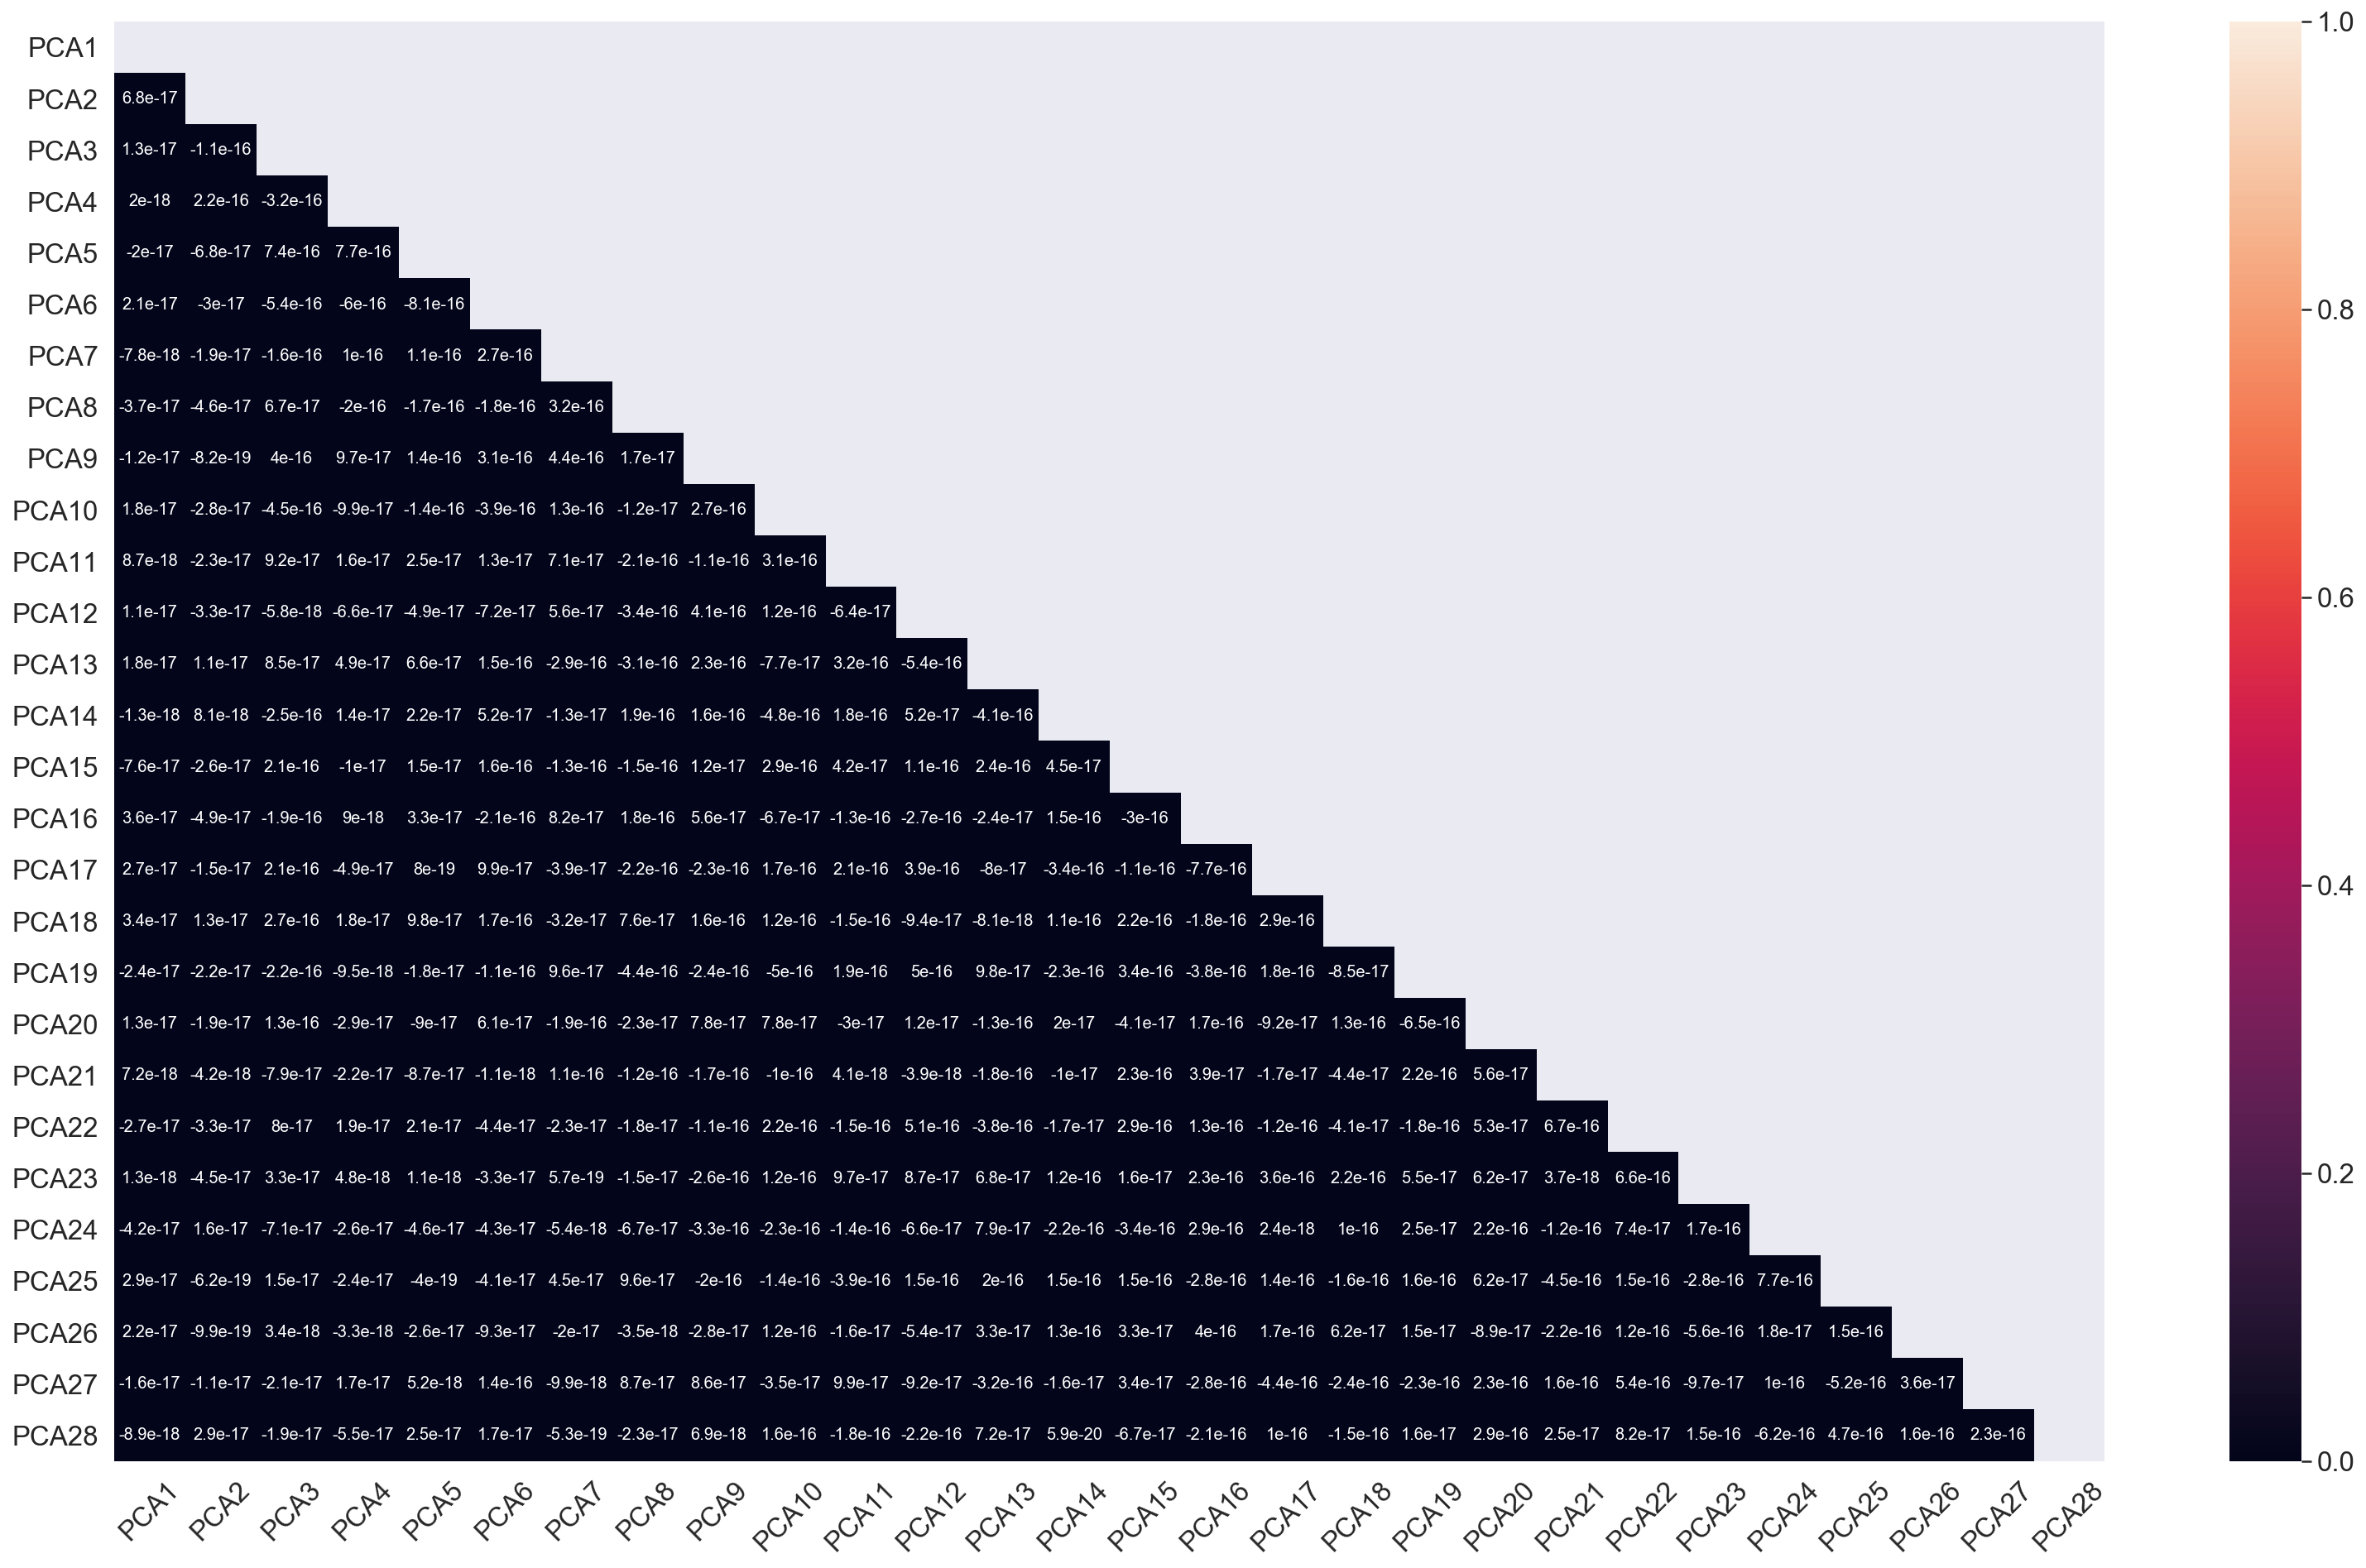

In [23]:
X_train_pca_corr = X_train_pca.corr()

mask = np.zeros_like(X_train_pca_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(24, 16))
ax = sns.heatmap(X_train_pca_corr, mask=mask, annot=True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), rotation=45)
ax.set_ylim(X_train_pca_corr.shape[1], 0)
plt.show()

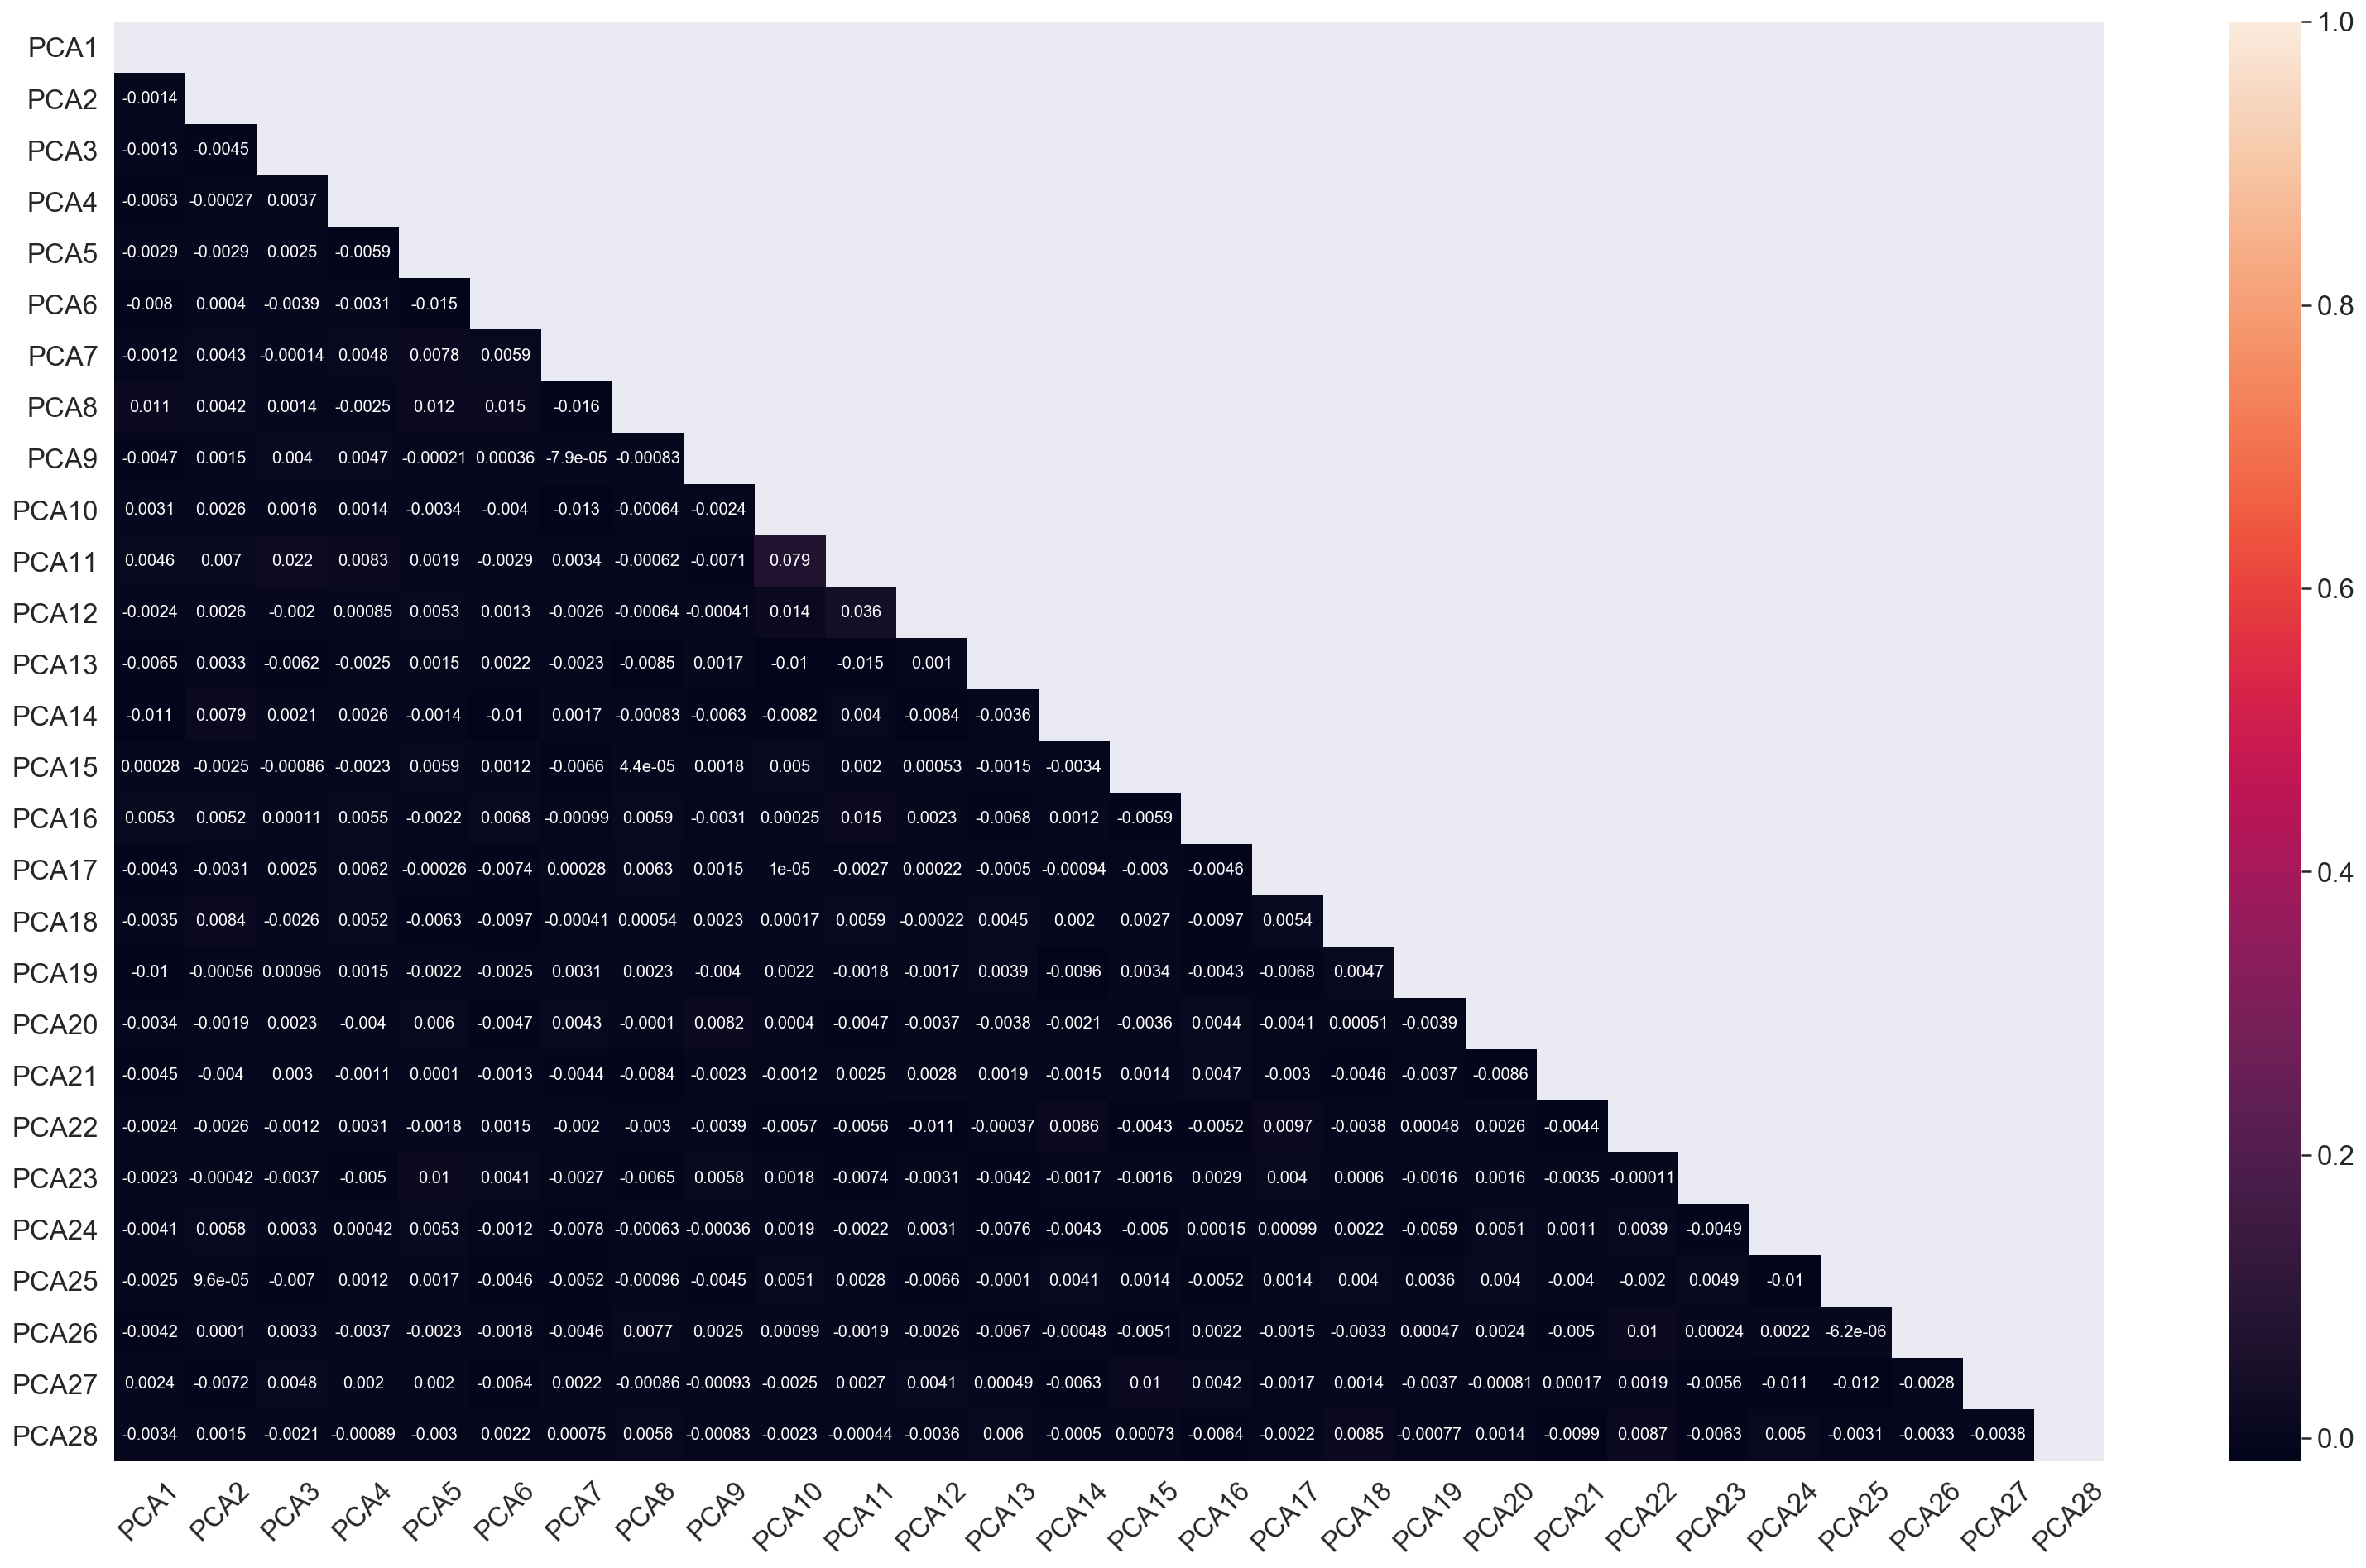

In [24]:
X_test_pca_corr = X_test_pca.corr()

mask = np.zeros_like(X_test_pca_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(24, 16))
ax = sns.heatmap(X_test_pca_corr, mask=mask, annot=True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), rotation=45)
ax.set_ylim(X_test_pca_corr.shape[1], 0)
plt.show()

### Building basic Logistic Regression model for readmission prediction

In [25]:
modelLR = LogisticRegression()

modelLR.fit(X_train_pca,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
print("Score(Train): ", modelLR.score(X_train_pca, y_train))
print("Cross Val Score (Train): ", cross_val_score(modelLR, X_train_pca, y_train, cv =5).mean()) 
print("Score (Test): ", modelLR.score(X_test_pca, y_test))

Score(Train):  0.7422830836028822
Cross Val Score (Train):  0.742315812555716
Score (Test):  0.7423581262409181


In [27]:
importance = modelLR.coef_[0]

importanceDF = pd.DataFrame(importance, index=X_train_pca.columns, 
                          columns=["Importance"])
importanceDF.sort_values(by='Importance', ascending=False).head(15)

,Importance
PCA11,0.020605
PCA4,0.014765
PCA16,0.014060
PCA14,0.009757
PCA18,0.008989
PCA27,0.008353
PCA26,0.005917
PCA10,0.005117
PCA6,0.004415
PCA24,0.003292


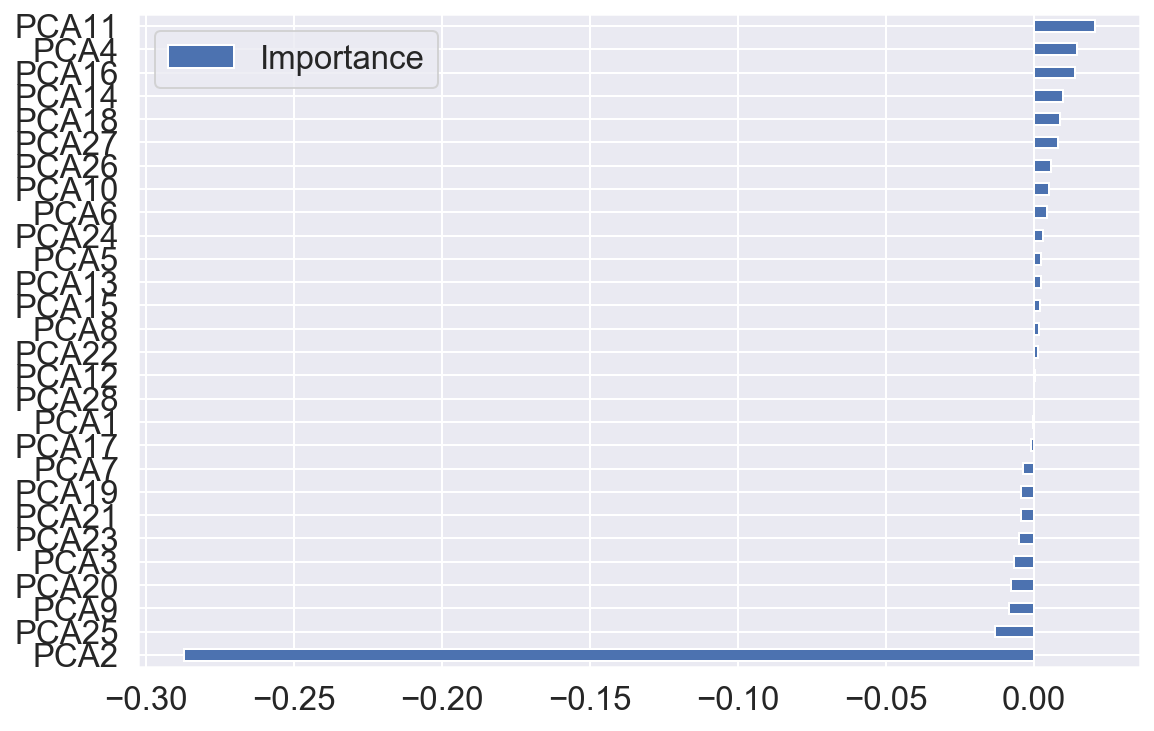

In [28]:
importanceDF.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(8, 6))
plt.show()

In [29]:
# Predictons and Probabilities

predictions_LRBase = modelLR.predict(X_test_pca)
predictions_LRBase

array([1, 1, 1, ..., 1, 1, 1])

In [30]:
probabilities_LRBase = modelLR.predict_proba(X_test_pca)
probabilities_LRBase

array([[0.13620057, 0.86379943],
       [0.30344409, 0.69655591],
       [0.13815305, 0.86184695],
       ...,
       [0.13277083, 0.86722917],
       [0.21765963, 0.78234037],
       [0.14012027, 0.85987973]])

In [31]:
labels=[0, 1]
confusion_mat = confusion_matrix(y_test, predictions_LRBase, labels=labels) # it is imp to put labels else its confusing
#print(labels)
#print(confusion_mat)

pd.DataFrame(confusion_mat,
             columns=['Predicted_No_Readmissions', 'Predicted_Readmissions'],
             index=['True_No_Readmissions', 'True_Readmissions'])

,Predicted_No_Readmissions,Predicted_Readmissions
True_No_Readmissions,484,20271
True_Readmissions,3346,67565


In [32]:
print(classification_report(y_test, predictions_LRBase))

              precision    recall  f1-score   support

           0       0.13      0.02      0.04     20755
           1       0.77      0.95      0.85     70911

    accuracy                           0.74     91666
   macro avg       0.45      0.49      0.45     91666
weighted avg       0.62      0.74      0.67     91666



In [33]:
def plot_f1_lines(figsize=(8,6),fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)
    
    # add lines of constant F1 scores
    
    for const in np.linspace(0.2,0.9,8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                 color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                     xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

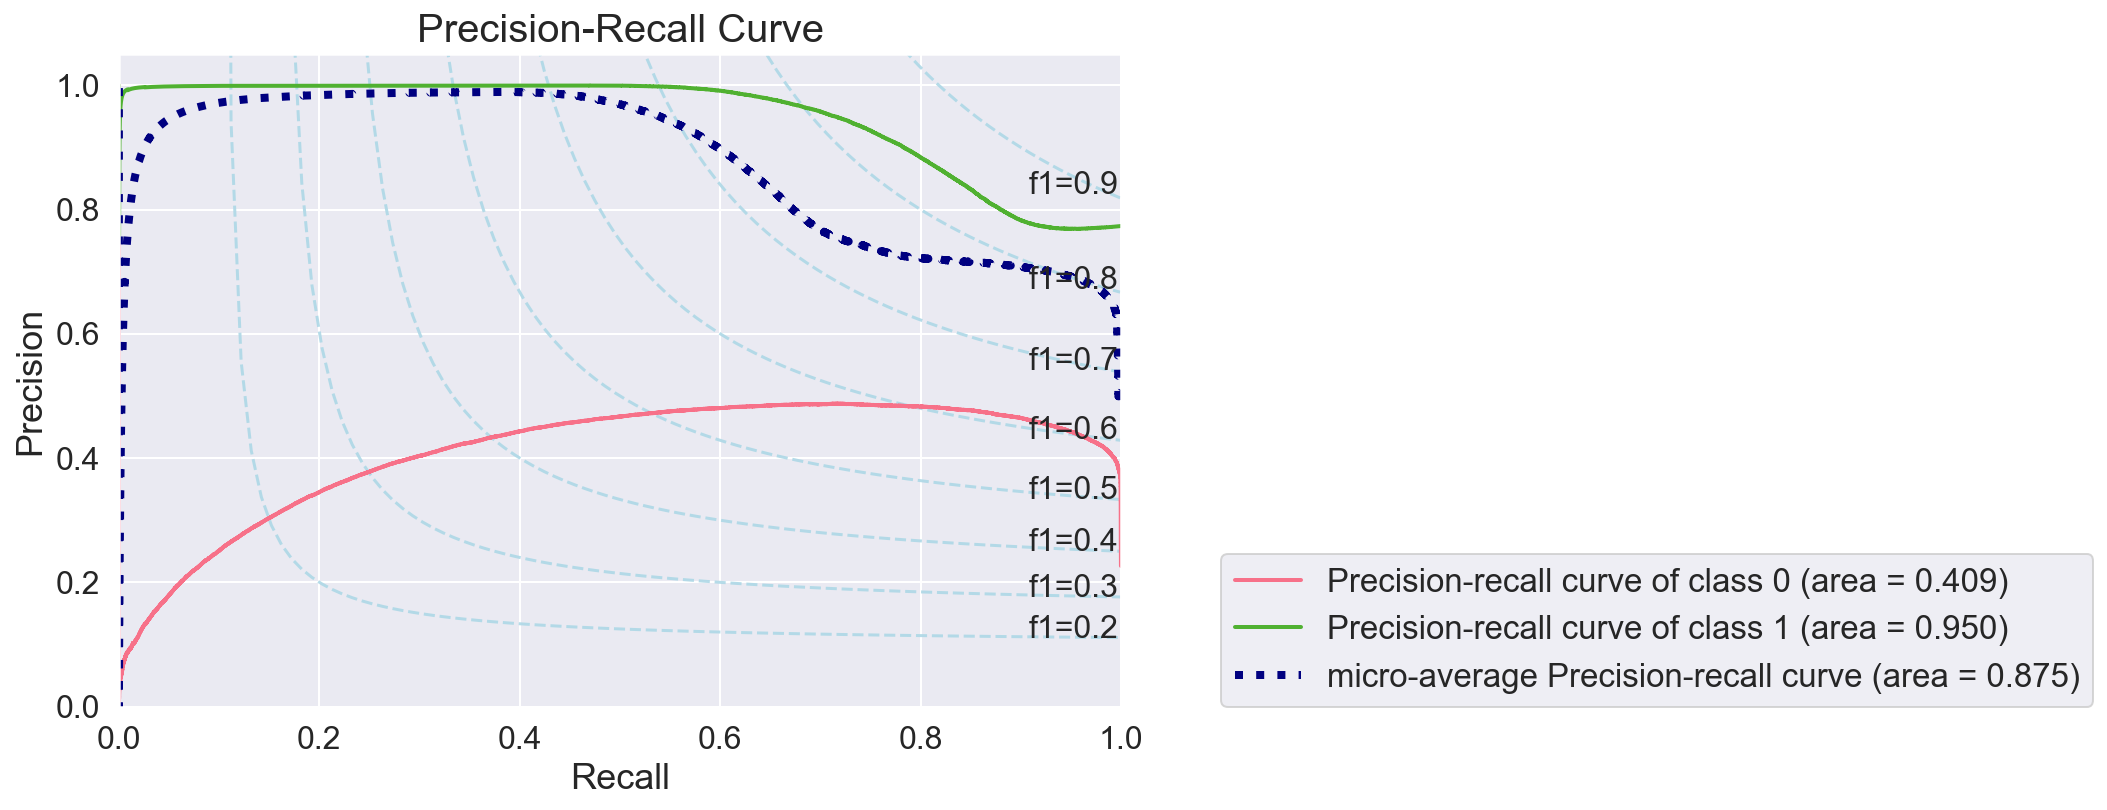

In [34]:
# plot_f1_lines # already defined

# Recall Precision plot

fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, probabilities_LRBase, 
                       plot_micro=True, 
                       title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()

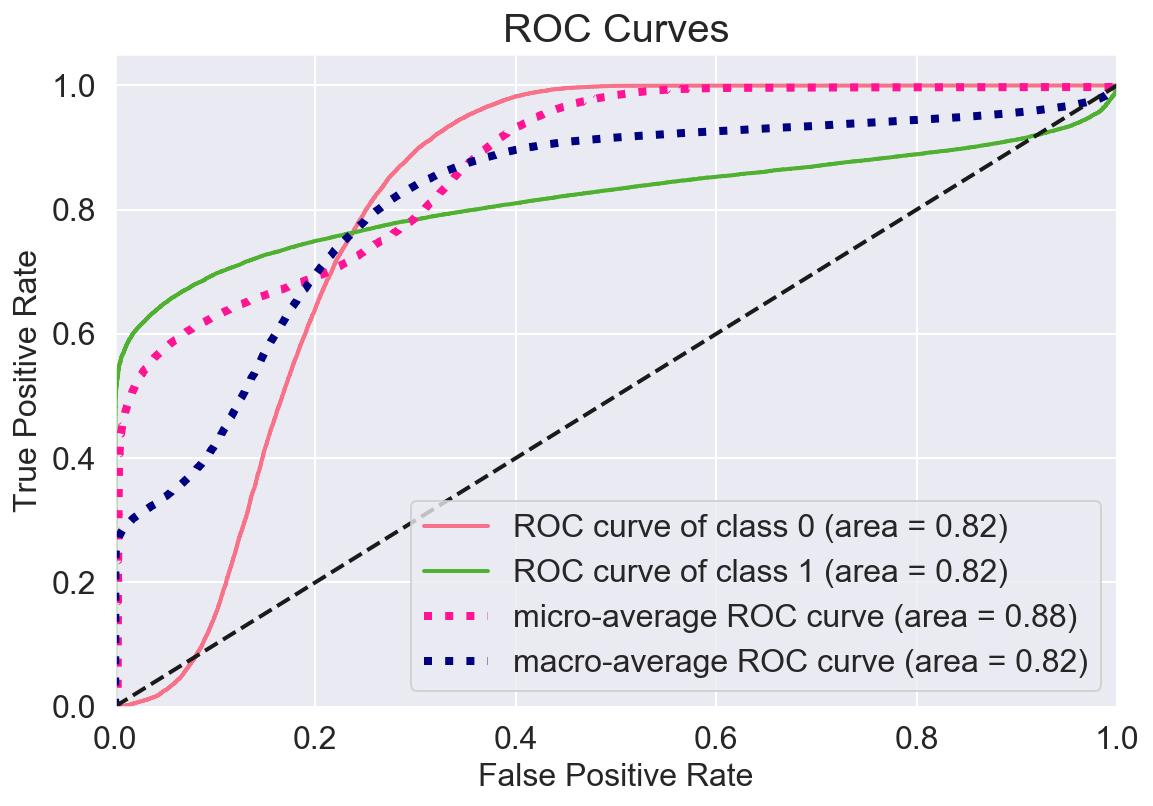

In [35]:
# ROC plot

skplt.metrics.plot_roc(y_test, probabilities_LRBase, plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(8,6), cmap=cmap)
plt.show()

### Random Forest

In [ ]:
datetime.now()

In [36]:
modelRF = RandomForestClassifier(n_estimators=100, criterion='gini')
modelRF.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
print("Score(Train): ", modelRF.score(X_train_pca, y_train))
print("Cross Val Score (Train): ", cross_val_score(modelRF, X_train_pca, y_train, cv =5).mean()) 
print("Score (Test): ", modelRF.score(X_test_pca, y_test))

Score(Train):  1.0
Cross Val Score (Train):  0.9490129820763972
Score (Test):  0.9476141644666507


In [38]:
datetime.now()

datetime.datetime(2020, 5, 11, 7, 52, 13, 961320)

In [ ]:
# Write function for diff models and grid search pipeline

LR,
KNN,
DT,
RF
SVM

In [ ]:
#week 5 day 1

pipe = Pipeline(steps=[('scaler', scaler),
                       ('model', model)])

pipe.fit(X, y)

columns_to_drop = ['PassengerId', 'Name']
columns_to_dummify = ['Sex', 'Pclass', 'Embarked']

tprep = TitanticPreprocessor(columns_to_drop=columns_to_drop,
                             columns_to_dummify=columns_to_dummify)
scaler = StandardScaler()
model = LogisticRegression(solver='lbfgs', random_state=1)

pipe = Pipeline(steps=[('titanic_prep', tprep),
                       ('scaler', scaler),
                       ('model', model)
                      ]
               )


scaler = StandardScaler()
#scaler = MinMaxScaler()
poly = PolynomialFeatures(include_bias=False)
model = LogisticRegression(solver='lbfgs')
#model = KNeighborsClassifier()
fu_pipe = Pipeline(steps=(('union', fu),
                          ('poly', poly),
                          ('scaler', scaler),
                          ('model', model)))

In [ ]:
# setup the grid search

params = {'C': np.logspace(-4, 4, 10),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))
print('Best estimator coefficients:')
print(gs.best_estimator_.coef_)

In [ ]:
# Can I find imp features (rev engg PCAs to real feature) - https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a

In [ ]:
# Can i do deeper analytics to find which diseases are mostly like for readmssion or mots/leat expenseive so that we 

# can target the low hanging fruits

In [ ]:
# Can i look at probablities and figure out the index and relate to the patient

In [ ]:
final2008_2009DF_selectedFeatures['READMIT7'].unique()

In [ ]:
final2008_2009DF_selectedFeatures['READMIT30'].unique()

In [ ]:
final2008_2009DF_selectedFeatures['READMIT60'].unique()

In [ ]:
final2008_2009DF_selectedFeatures['READMIT90'].unique()

In [ ]:
# do oversample for eda

# Class count
count_class_0, count_class_1 = final2008_2009DF_selectedFeatures['DEAD'].value_counts() #READMIT7_FLAG
count_class_0, count_class_1

In [ ]:
# Divide by class
df_class_0 = final2008_2009DF_selectedFeatures[final2008_2009DF_selectedFeatures['DEAD'] == 0]   
df_class_1 = final2008_2009DF_selectedFeatures[final2008_2009DF_selectedFeatures['DEAD'] == 1]
print(df_class_0.shape)
print(df_class_1.shape)

In [ ]:
# Oversampling class 1

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
final2008_2009DF_over = pd.concat([df_class_0, df_class_1_over], axis=0)
print(final2008_2009DF_over.shape)
final2008_2009DF_over.head()